<a href="https://colab.research.google.com/github/karahanmerves/BFRCA/blob/main/BFRC_Geadient_Boosting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#"Data mining approach for predicting fiber diameter, length, and ratio: A case study of BFRC (Basalt Fiber Reinforced Concrete)"
**WITH MULTIPLE REGRESSION**




#Import to Librarys


In [739]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline

#Download Data (format CSV)

In [740]:
dt = pd.read_csv('/content/bfrc.csv')
dt.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.00,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.05,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.10,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.15,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.20,4.74


In [741]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Su (kg/m3)            267 non-null    float64
 1   Cimento (kg/m3)       267 non-null    float64
 2   Ucucu kul (kg/m3)     267 non-null    float64
 3   Mikrosilika (kg/m3)   267 non-null    float64
 4   Kalin agrega (kg/m3)  267 non-null    float64
 5   Ince agrega (kg/m3)   267 non-null    int64  
 6   Su azaltici (kg/m3)   267 non-null    float64
 7   Fiber capi (mm)       267 non-null    float64
 8   Fiber uzunlugu (mm)   267 non-null    int64  
 9   Fiber orani (%)       267 non-null    float64
 10  Cekme dayanimi (MPa)  267 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.1 KB


## Checking the number of null values in th dataset

In [742]:
dt.isnull().sum()

Su (kg/m3)              0
Cimento (kg/m3)         0
Ucucu kul (kg/m3)       0
Mikrosilika (kg/m3)     0
Kalin agrega (kg/m3)    0
Ince agrega (kg/m3)     0
Su azaltici (kg/m3)     0
Fiber capi (mm)         0
Fiber uzunlugu (mm)     0
Fiber orani (%)         0
Cekme dayanimi (MPa)    0
dtype: int64

In [743]:
dt.describe()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,402.544719,45.717453,16.429213,1079.504644,697.829438,177.606742,3.337865,0.015930,16.749064,0.126592,4.348101
std,73.920000,56.470326,31.284398,161.986898,88.452215,29.875916,2.242625,0.002699,6.376704,0.106337,1.739823
min,217.000000,0.000000,0.000000,512.000000,507.000000,125.000000,0.000000,0.013000,6.000000,0.000000,2.200000
25%,353.500000,0.000000,0.000000,998.000000,633.000000,160.000000,2.400000,0.015000,12.000000,0.050000,3.182500
50%,402.000000,0.000000,0.000000,1125.000000,688.000000,179.000000,4.000000,0.015000,18.000000,0.100000,3.724000
75%,450.000000,86.000000,20.000000,1180.000000,781.000000,188.000000,4.810000,0.015500,20.000000,0.200000,4.885000
max,613.330000,168.000000,126.000000,1540.000000,875.000000,301.000000,8.360000,0.030000,30.000000,0.500000,9.800000


#Bootstrap ile Örneklem artırma

In [744]:
bootstrap_sample = dt.sample(n=500, replace=True)

In [745]:
dt = pd.concat([dt, bootstrap_sample])

In [746]:
dt.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            154,  90, 260,  97,  35, 196, 242, 266,  75,  22],
           dtype='int64', length=767)

In [747]:
dt.columns

Index(['Su (kg/m3)', 'Cimento (kg/m3)', 'Ucucu kul (kg/m3)',
       'Mikrosilika (kg/m3)', 'Kalin agrega (kg/m3)', 'Ince agrega (kg/m3)',
       'Su azaltici (kg/m3)', 'Fiber capi (mm)', 'Fiber uzunlugu (mm)',
       'Fiber orani (%)', 'Cekme dayanimi (MPa)'],
      dtype='object')

##CORRELATION DIAGRAM

<Axes: >

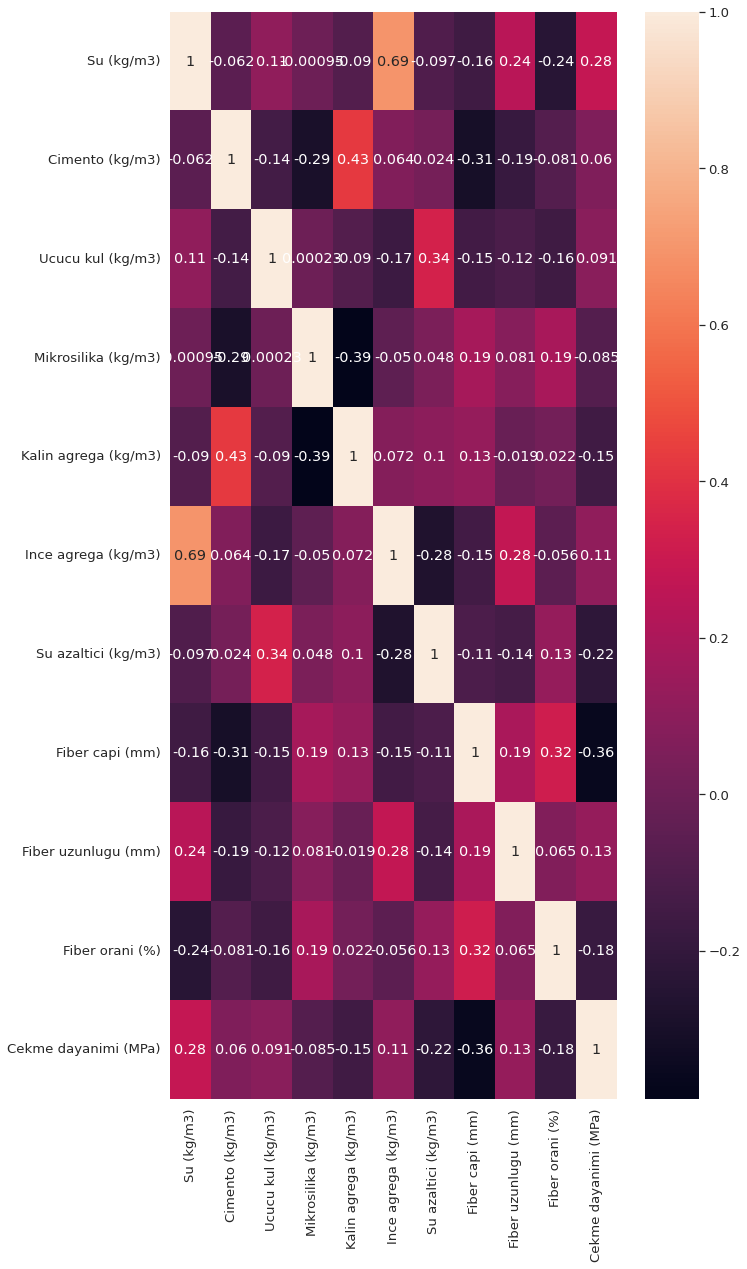

In [748]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)




##DATA VISUALIZATION





In [749]:
#sns.set(style='white',font_scale=1.2, rc={'figure.figsize':(10,20)})
#ax=dt.hist(bins=20,color='red' )

#CORRELATIONS SCATTER PLOT 

In [750]:
#sns.pairplot(dt, height=3)

#Target Feature Separation

'Stress' Seperation

In [751]:
X = dt.drop(['Fiber orani (%)','Fiber capi (mm)','Fiber uzunlugu (mm)'], axis = 1)
y1=dt['Fiber capi (mm)']
y2=dt['Fiber orani (%)']
y3=dt['Fiber uzunlugu (mm)']

In [752]:
X

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.00,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.00,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.00,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.00,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.00,4.74
...,...,...,...,...,...,...,...,...
196,470.0,22.0,108.0,1052.0,696.0,162,4.90,3.47
242,390.0,0.0,0.0,1180.0,635.0,195,7.00,3.62
266,264.0,0.0,0.0,851.0,507.0,145,0.00,2.88
75,478.4,0.0,0.0,1181.3,549.3,191,0.00,3.15


# Feature Shape Control

In [753]:
y1.shape,X.shape

((767,), (767, 8))

In [754]:
y2.shape,X.shape

((767,), (767, 8))

In [755]:
y3.shape,X.shape

((767,), (767, 8))

#Feature visualization 

First 5 lines for feature 'Stress' and 'max diameter' 

In [756]:
X.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.74


#Split

Train Test Split for 'Stress'

In [757]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

#Normalization Scaler

In [758]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [759]:
X_train.shape

(613, 8)


# MultiOutput Regressor



In [760]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as lr

In [761]:
from sklearn.ensemble import GradientBoostingRegressor
mor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [762]:
#rf = RandomForestRegressor(n_estimators = 400, random_state =0)
#mor = MultiOutputRegressor(rf)

In [763]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.005,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model = GradientBoostingRegressor(**params)



# Modeli eğitme

mor = MultiOutputRegressor(gb_model)
mor.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.005,
                                                         max_depth=5,
                                                         min_samples_split=6,
                                                         n_estimators=500))

##PREDICTIVING TO TARGET FEATURES

In [764]:
y_pred = mor.predict(X_test)

In [765]:
y1_pred, y2_pred,y3_pred = y_pred[:, 0], y_pred[:, 1],y_pred[:,2]

In [766]:
y1_test.array,y1_pred

(<PandasArray>
 [0.018, 0.015, 0.015, 0.018,  0.02, 0.015, 0.018, 0.015, 0.015, 0.015,
  ...
  0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.016, 0.015]
 Length: 154, dtype: float64,
 array([0.01783261, 0.01499826, 0.01510439, 0.0178238 , 0.01957047,
        0.01510439, 0.01783261, 0.01512659, 0.01509323, 0.01542039,
        0.01509323, 0.01509136, 0.01517735, 0.01509737, 0.01529734,
        0.01783261, 0.01724117, 0.01509421, 0.01509737, 0.01510068,
        0.01509323, 0.01815535, 0.01786661, 0.01509154, 0.01511104,
        0.01509055, 0.01783261, 0.0132564 , 0.0132564 , 0.01957047,
        0.01509323, 0.01513864, 0.01542039, 0.01957047, 0.01516895,
        0.01724117, 0.01509323, 0.01516895, 0.01510153, 0.01610355,
        0.01786637, 0.01510408, 0.01724117, 0.01517735, 0.01510506,
        0.01529734, 0.0159197 , 0.01743076, 0.01510408, 0.01509136,
        0.01785215, 0.01509453, 0.01509136, 0.0132564 , 0.01509323,
        0.01518192, 0.01509421, 0.01724117, 0.01518192, 0

#Mean Square Error (MSE)

In [767]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [768]:
mse_y1 = mean_squared_error(y1_test,y1_pred)
mse_y2 = mean_squared_error(y2_test, y2_pred)
mse_y3 = mean_squared_error(y3_test, y3_pred)

print(f"Y1 için MSE: {mse_y1:.2f}")
print(f"Y2 için MSE: {mse_y2:.2f}")
print(f"Y3 için MSE: {mse_y3:.2f}")

Y1 için MSE: 0.00
Y2 için MSE: 0.00
Y3 için MSE: 5.91


## R-Square Error (R²)

In [769]:
r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
r2_y3 = r2_score(y3_test, y3_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: 0.93
Y2 için R-kare: 0.71
Y3 için R-kare: 0.87


In [770]:
y1_pred.shape

(154,)

#Improvement with Hyperparameter Tuning

In [783]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'quantile'}

# Modeli oluşturma
gb_model1 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model1.fit(X_train, y1_train)

y1_pred = gb_model1.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y1_test, y1_pred)
r2 = gb_model1.score(X_test, y1_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 0.00
R^2 score: 0.03


In [784]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 710,
          'max_depth': 4,
          'min_samples_split': 8,
          'learning_rate': 0.005,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model2 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model2.fit(X_train, y2_train)

y2_pred = gb_model2.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y2_test, y2_pred)
r2 = gb_model2.score(X_test, y2_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))


MSE: 0.00
R^2 score: 0.69


In [785]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model3 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model3.fit(X_train, y3_train)

y3_pred = gb_model3.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y3_test, y3_pred)
r2 = gb_model3.score(X_test, y3_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 6.72
R^2 score: 0.85


#An Example of Using the Model

In [774]:
oran=gb_model1.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [775]:
cap=gb_model2.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [776]:
uzunluk=gb_model3.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [777]:
print(f"Tahmin edilen değerler=\nFiber capi (mm)={cap}\nFiber uzunlugu (mm)={uzunluk}\nFiber orani (%)={oran} \n\nGerçek değerler=\n{dt.iloc[249,7:10]}")

Tahmin edilen değerler=
Fiber capi (mm)=[0.26228138]
Fiber uzunlugu (mm)=[15.99086409]
Fiber orani (%)=[0.018] 

Gerçek değerler=
Fiber capi (mm)         0.015
Fiber uzunlugu (mm)    12.000
Fiber orani (%)         0.100
Name: 249, dtype: float64


##PREDICTIVING TO TARGET FEATURES

In [786]:
y_pred = mor.predict(X_test)

In [787]:
y1_pred, y2_pred,y3_pred = y_pred[:, 0], y_pred[:, 1],y_pred[:,2]

In [788]:
try_values=mor.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [789]:
cap,oran,uzunluk = try_values[:, 0], try_values[:, 1],try_values[:,2]

In [790]:
print(f"Tahmin edilen değerler=\nFiber capi (mm)={cap}\nFiber uzunlugu (mm)={uzunluk}\nFiber orani (%)={oran} \n\nGerçek değerler=\n{dt.iloc[249,7:10]}")

Tahmin edilen değerler=
Fiber capi (mm)=[0.01516803]
Fiber uzunlugu (mm)=[14.52056667]
Fiber orani (%)=[0.27098624] 

Gerçek değerler=
Fiber capi (mm)         0.015
Fiber uzunlugu (mm)    12.000
Fiber orani (%)         0.100
Name: 249, dtype: float64
